In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [2]:
path = "../img/detection"
path_dog = os.path.join(path, 'dog')
path_nodog = os.path.join(path, 'no_dog')

path_dog_corgi = os.path.join(path_dog, 'corgi')
path_dog_shiba = os.path.join(path_dog, 'shiba')
path_dog_gr = os.path.join(path_dog, 'gr')

path_nodog_parrot = os.path.join(path_nodog, 'parrot')
path_nodog_tiger = os.path.join(path_nodog, 'tiger')
path_nodog_rabbit = os.path.join(path_nodog, 'rabbit')
class_names = ['dog', 'no_dog']

In [3]:
split = 0.2

num_corgi = len(os.listdir(path_dog_corgi))
num_shiba = len(os.listdir(path_dog_shiba))
num_gr = len(os.listdir(path_dog_gr))
num_dogs = num_gr + num_shiba + num_corgi

num_parrot = len(os.listdir(path_nodog_parrot))
num_tiger = len(os.listdir(path_nodog_tiger))
num_rabbit = len(os.listdir(path_nodog_rabbit))
num_nodogs = num_parrot + num_tiger + num_rabbit

total_img_num = num_dogs + num_nodogs

total_val = total_img_num * split
total_train = total_img_num - total_val

In [4]:
epochs = 30
IMG_HEIGHT = 112
IMG_WIDTH = 112
batch_size = 128

In [5]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=split)

train_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation') # set as validation data

Found 5217 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.


### 1. NB 3 3 3 Dropout 0.8(2) dense 512

In [6]:
model_1 = Sequential([
    Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.8),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])
model_1.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 112, 112, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
batch_normali

In [7]:
history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
 21/104 [=====>........................] - ETA: 42s - loss: 0.8455 - acc: 0.5124

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 136s 1s/step - loss: 2.4686 - acc: 0.6801 - val_loss: 0.8437 - val_acc: 0.5115
Epoch 2/35
104/104 [==============================] - 122s 1s/step - loss: 0.5875 - acc: 0.7368 - val_loss: 0.8669 - val_acc: 0.5108
Epoch 3/35
104/104 [==============================] - 124s 1s/step - loss: 0.5387 - acc: 0.7631 - val_loss: 0.8469 - val_acc: 0.5215
Epoch 4/35
104/104 [==============================] - 124s 1s/step - loss: 0.5222 - acc: 0.7689 - val_loss: 0.5900 - val_acc: 0.6692
Epoch 5/35
104/104 [==============================] - 125s 1s/step - loss: 0.4968 - acc: 0.7662 - val_loss: 0.5616 - val_acc: 0.6923
Epoch 6/35
104/104 [==============================] - 124s 1s/step - loss: 0.4894 - acc: 0.7813 - val_loss: 0.5381 - val_acc: 0.7031
Epoch 7/35
104/104 [==============================] - 124s 1s/step - loss: 0.4812 - acc: 0.7896 - val_loss: 0.4267 - val_acc: 0.8223
Epoch 8/35
104/104 [==============================] - 127s 1s/step - loss: 0.465

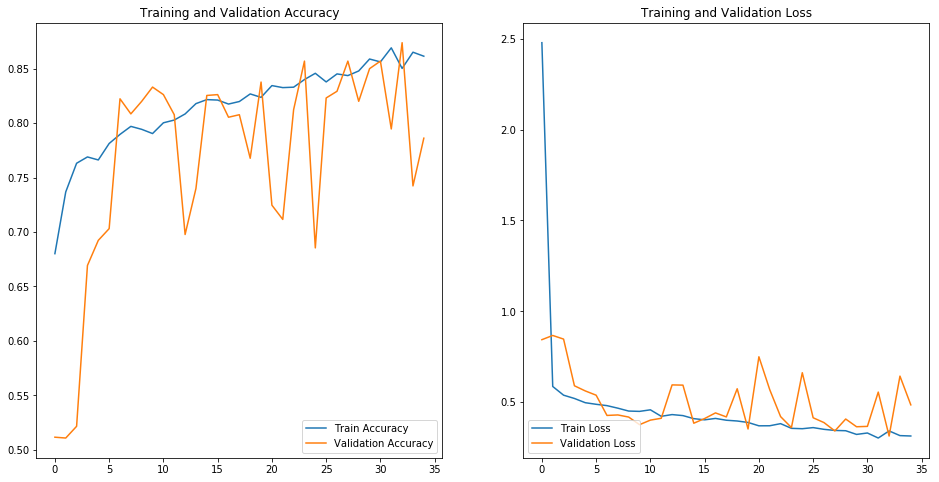

In [8]:
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

In [7]:
## reduce picture size
history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/30
 4/40 [==>...........................] - ETA: 26s - loss: 0.7055 - acc: 0.4941

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


40/40 [==============================] - 39s 970ms/step - loss: 1.7915 - acc: 0.6534 - val_loss: 0.6967 - val_acc: 0.5133
Epoch 2/30
40/40 [==============================] - 31s 768ms/step - loss: 0.5763 - acc: 0.7271 - val_loss: 0.7432 - val_acc: 0.5094
Epoch 3/30
40/40 [==============================] - 31s 786ms/step - loss: 0.5422 - acc: 0.7493 - val_loss: 0.8457 - val_acc: 0.5086
Epoch 4/30
40/40 [==============================] - 32s 798ms/step - loss: 0.5236 - acc: 0.7534 - val_loss: 1.0535 - val_acc: 0.5086
Epoch 5/30
40/40 [==============================] - 32s 793ms/step - loss: 0.5103 - acc: 0.7717 - val_loss: 0.8202 - val_acc: 0.5094
Epoch 6/30
40/40 [==============================] - 32s 797ms/step - loss: 0.4937 - acc: 0.7821 - val_loss: 0.8574 - val_acc: 0.5133
Epoch 7/30
40/40 [==============================] - 32s 801ms/step - loss: 0.4616 - acc: 0.8057 - val_loss: 0.9205 - val_acc: 0.5164
Epoch 8/30
40/40 [==============================] - 33s 836ms/step - loss: 0.455

In [9]:
history_2 = model_1.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/30
40/40 [==============================] - 31s 776ms/step - loss: 0.3139 - acc: 0.8727 - val_loss: 0.3340 - val_acc: 0.8680
Epoch 2/30
40/40 [==============================] - 31s 770ms/step - loss: 0.3126 - acc: 0.8756 - val_loss: 0.3460 - val_acc: 0.8445
Epoch 3/30
40/40 [==============================] - 31s 766ms/step - loss: 0.2979 - acc: 0.8786 - val_loss: 0.3380 - val_acc: 0.8508
Epoch 4/30
40/40 [==============================] - 31s 767ms/step - loss: 0.3082 - acc: 0.8762 - val_loss: 0.6301 - val_acc: 0.7422
Epoch 5/30
40/40 [==============================] - 31s 784ms/step - loss: 0.3118 - acc: 0.8723 - val_loss: 0.3373 - val_acc: 0.8586
Epoch 6/30
40/40 [==============================] - 31s 770ms/step - loss: 0.3001 - acc: 0.8711 - val_loss: 0.7363 - val_acc: 0.6875
Epoch 7/30
40/40 [==============================] - 32s 794ms/step - loss: 0.3032 - acc: 0.8764 - val_loss: 0.3503 - val_acc: 0.8406
Epoch 8/30
40/40 [==============================] - 32s 801ms/step - 

In [12]:
acc1 = history_1.history['acc']
val_acc1 = history_1.history['val_acc']

loss1 = history_1.history['loss']
val_loss1 = history_1.history['val_loss']

acc2 = history_2.history['acc']
val_acc2 = history_2.history['val_acc']

loss2 = history_2.history['loss']
val_loss2 = history_2.history['val_loss']

In [17]:
print(acc1.append(acc2))

None


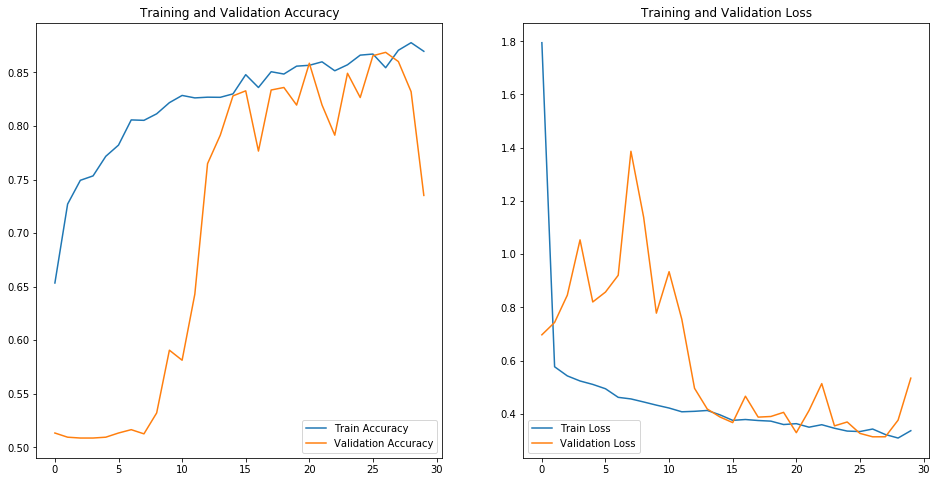

In [8]:
epochs_range = range(60)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

### 2. NB 3 3 3 Dropout 0.5 0.8 dense 512

In [9]:
model_2 = Sequential([
    Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
activation_3 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 112, 112, 32)     

In [10]:
history_2 = model_2.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
 21/104 [=====>........................] - ETA: 28s - loss: 0.8370 - acc: 0.5114

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 125s 1s/step - loss: 4.4268 - acc: 0.6729 - val_loss: 0.8352 - val_acc: 0.5108
Epoch 2/35
104/104 [==============================] - 125s 1s/step - loss: 0.5753 - acc: 0.7246 - val_loss: 0.8069 - val_acc: 0.5154
Epoch 3/35
104/104 [==============================] - 121s 1s/step - loss: 0.5377 - acc: 0.7440 - val_loss: 0.6934 - val_acc: 0.5646
Epoch 4/35
104/104 [==============================] - 125s 1s/step - loss: 0.5237 - acc: 0.7639 - val_loss: 0.5990 - val_acc: 0.6646
Epoch 5/35
104/104 [==============================] - 122s 1s/step - loss: 0.5071 - acc: 0.7761 - val_loss: 0.4964 - val_acc: 0.7708
Epoch 6/35
104/104 [==============================] - 128s 1s/step - loss: 0.4948 - acc: 0.7749 - val_loss: 0.5025 - val_acc: 0.7500
Epoch 7/35
104/104 [==============================] - 123s 1s/step - loss: 0.4958 - acc: 0.7761 - val_loss: 0.4598 - val_acc: 0.7915
Epoch 8/35
104/104 [==============================] - 123s 1s/step - loss: 0.494

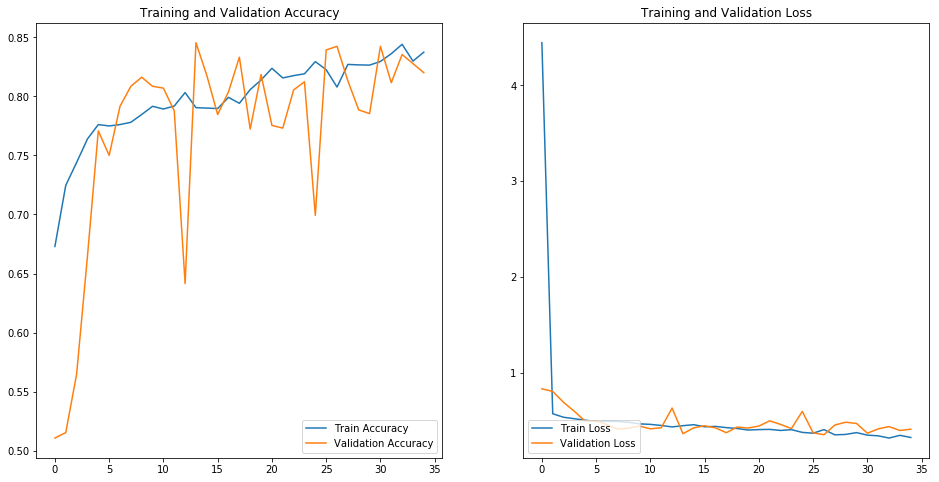

In [11]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

### 3. NB 3 3 3 Dropout 0.8(2) dense 512 （lr decrease 0.0005）

In [13]:
model_3 = Sequential([
     Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.8),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_3.compile(optimizer=adam,
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
activation_9 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
activation_10 (Activation)   (None, 112, 112, 32)     

In [15]:
history_3 = model_3.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
104/104 [==============================] - 121s 1s/step - loss: 0.5365 - acc: 0.7381 - val_loss: 0.5813 - val_acc: 0.7323
Epoch 2/35
104/104 [==============================] - 126s 1s/step - loss: 0.5363 - acc: 0.7486 - val_loss: 0.4985 - val_acc: 0.7508
Epoch 3/35
104/104 [==============================] - 123s 1s/step - loss: 0.5268 - acc: 0.7494 - val_loss: 0.5340 - val_acc: 0.7423
Epoch 4/35
104/104 [==============================] - 123s 1s/step - loss: 0.5320 - acc: 0.7581 - val_loss: 0.4302 - val_acc: 0.8146
Epoch 5/35
104/104 [==============================] - 121s 1s/step - loss: 0.5297 - acc: 0.7428 - val_loss: 0.5002 - val_acc: 0.7738
Epoch 6/35
104/104 [==============================] - 120s 1s/step - loss: 0.5318 - acc: 0.7498 - val_loss: 0.5320 - val_acc: 0.7438
Epoch 7/35
104/104 [==============================] - 125s 1s/step - loss: 0.5231 - acc: 0.7544 - val_loss: 0.7716 - val_acc: 0.7008
Epoch 8/35
104/104 [==============================] - 124s 1s/step - 

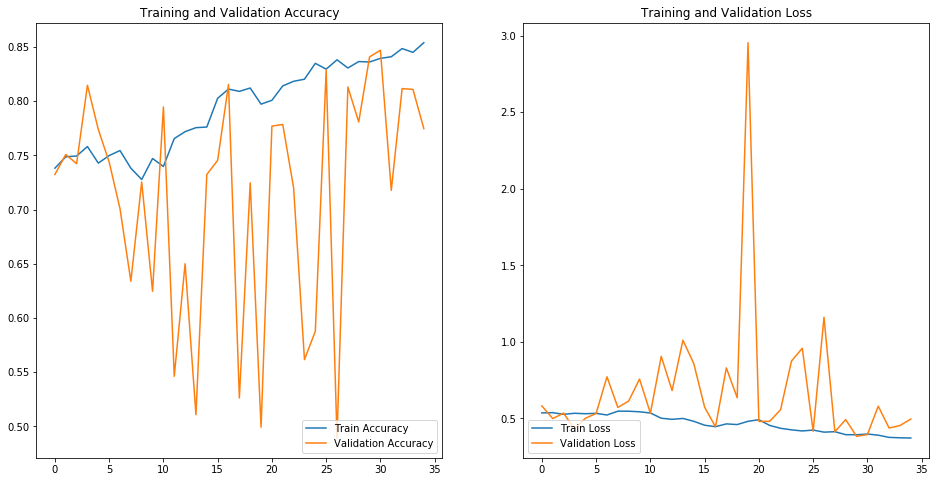

In [18]:
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

### 4. NB 3 3 3 Dropout 0.8(2) dense 512 （lr increase 0.002)

In [6]:
model_4 = Sequential([
     Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.8),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_4.compile(optimizer=adam,
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_4.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normali

In [7]:
history_4 = model_4.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
 17/104 [===>..........................] - ETA: 37s - loss: 0.8469 - acc: 0.5153

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 131s 1s/step - loss: 5.3635 - acc: 0.6689 - val_loss: 0.8574 - val_acc: 0.5085
Epoch 2/35
104/104 [==============================] - 120s 1s/step - loss: 0.5804 - acc: 0.7060 - val_loss: 0.9544 - val_acc: 0.5092
Epoch 3/35
104/104 [==============================] - 130s 1s/step - loss: 0.5524 - acc: 0.7447 - val_loss: 0.6653 - val_acc: 0.5892
Epoch 4/35
104/104 [==============================] - 135s 1s/step - loss: 0.5241 - acc: 0.7498 - val_loss: 0.6575 - val_acc: 0.6608
Epoch 5/35
104/104 [==============================] - 126s 1s/step - loss: 0.5225 - acc: 0.7527 - val_loss: 0.5615 - val_acc: 0.7262
Epoch 6/35
104/104 [==============================] - 131s 1s/step - loss: 0.5078 - acc: 0.7643 - val_loss: 0.4470 - val_acc: 0.7985
Epoch 7/35
104/104 [==============================] - 131s 1s/step - loss: 0.5062 - acc: 0.7685 - val_loss: 0.4741 - val_acc: 0.7746
Epoch 8/35
104/104 [==============================] - 132s 1s/step - loss: 0.496

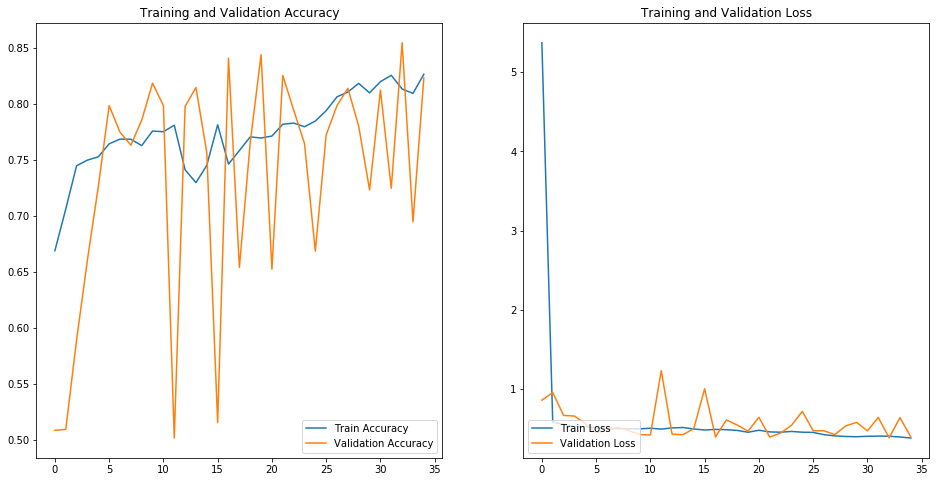

In [8]:
acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

## 5. sgd no dropout

In [9]:
model_5 = Sequential([
     Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_5.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
activation_3 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 112, 112, 32)     

In [10]:
history_5 = model_5.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
  9/104 [=>............................] - ETA: 34s - loss: 0.7745 - acc: 0.5178

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 118s 1s/step - loss: 0.7022 - acc: 0.7304 - val_loss: 0.7834 - val_acc: 0.5100
Epoch 2/35
104/104 [==============================] - 117s 1s/step - loss: 0.4200 - acc: 0.8130 - val_loss: 1.1981 - val_acc: 0.5100
Epoch 3/35
104/104 [==============================] - 117s 1s/step - loss: 0.3781 - acc: 0.8401 - val_loss: 1.1951 - val_acc: 0.5200
Epoch 4/35
104/104 [==============================] - 117s 1s/step - loss: 0.3299 - acc: 0.8576 - val_loss: 0.7102 - val_acc: 0.6408
Epoch 5/35
104/104 [==============================] - 119s 1s/step - loss: 0.2890 - acc: 0.8802 - val_loss: 0.4712 - val_acc: 0.7838
Epoch 6/35
104/104 [==============================] - 140s 1s/step - loss: 0.2520 - acc: 0.8977 - val_loss: 0.3808 - val_acc: 0.8269
Epoch 7/35
104/104 [==============================] - 121s 1s/step - loss: 0.2100 - acc: 0.9198 - val_loss: 0.3834 - val_acc: 0.8300
Epoch 8/35
104/104 [==============================] - 141s 1s/step - loss: 0.198

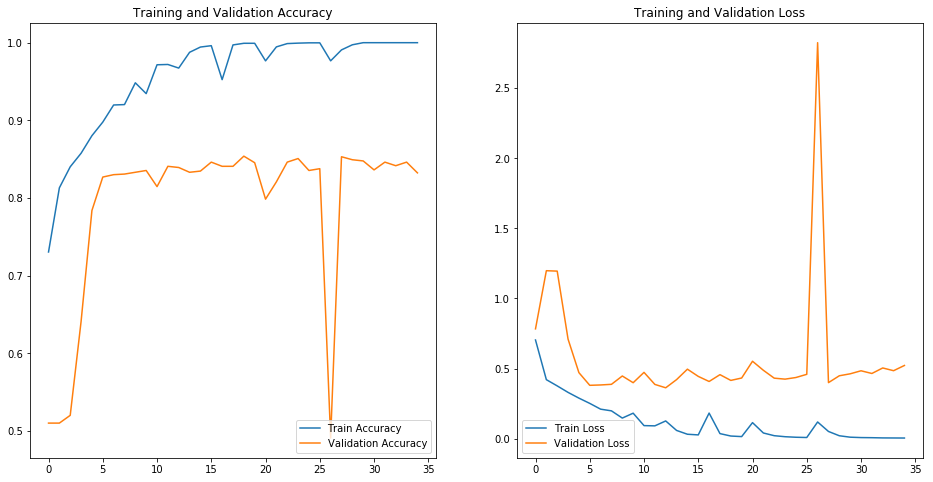

In [11]:
acc = history_5.history['acc']
val_acc = history_5.history['val_acc']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

## 6. sgd 0.8 0.8

In [14]:
model_6 = Sequential([
     Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.8),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])

model_6.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_12 (Batc (None, 224, 224, 16)      64        
_________________________________________________________________
activation_12 (Activation)   (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
activation_13 (Activation)   (None, 112, 112, 32)     

In [15]:
history_6 = model_6.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
  9/104 [=>............................] - ETA: 44s - loss: 0.8028 - acc: 0.5178

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 123s 1s/step - loss: 0.9463 - acc: 0.6929 - val_loss: 0.8136 - val_acc: 0.5100
Epoch 2/35
104/104 [==============================] - 121s 1s/step - loss: 0.5634 - acc: 0.7339 - val_loss: 0.8899 - val_acc: 0.5108
Epoch 3/35
104/104 [==============================] - 132s 1s/step - loss: 0.5238 - acc: 0.7592 - val_loss: 0.7526 - val_acc: 0.5400
Epoch 4/35
104/104 [==============================] - 124s 1s/step - loss: 0.5129 - acc: 0.7643 - val_loss: 0.5740 - val_acc: 0.7046
Epoch 5/35
104/104 [==============================] - 119s 1s/step - loss: 0.4876 - acc: 0.7765 - val_loss: 0.6020 - val_acc: 0.6677
Epoch 6/35
104/104 [==============================] - 128s 1s/step - loss: 0.4853 - acc: 0.7869 - val_loss: 0.5385 - val_acc: 0.7523
Epoch 7/35
104/104 [==============================] - 122s 1s/step - loss: 0.4708 - acc: 0.7939 - val_loss: 0.4760 - val_acc: 0.7869
Epoch 8/35
104/104 [==============================] - 119s 1s/step - loss: 0.460

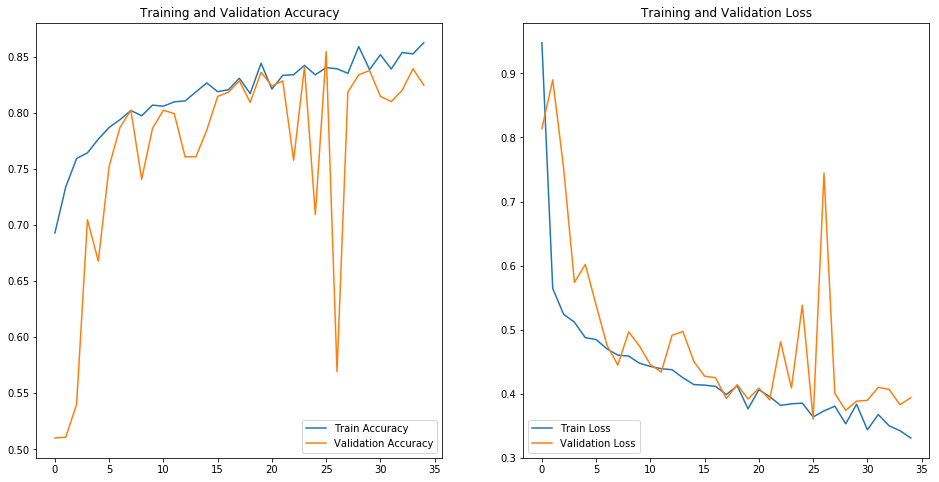

In [16]:
acc = history_6.history['acc']
val_acc = history_6.history['val_acc']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

## 7. sgd 0.3 0.5

In [6]:
model_7 = Sequential([
     Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_7.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_7.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normali

In [7]:
history_7 = model_7.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
 21/104 [=====>........................] - ETA: 26s - loss: 0.7094 - acc: 0.5114

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 123s 1s/step - loss: 0.6477 - acc: 0.7416 - val_loss: 0.7025 - val_acc: 0.5238
Epoch 2/35
104/104 [==============================] - 114s 1s/step - loss: 0.4558 - acc: 0.7952 - val_loss: 0.7603 - val_acc: 0.5238
Epoch 3/35
104/104 [==============================] - 117s 1s/step - loss: 0.4140 - acc: 0.8134 - val_loss: 0.8652 - val_acc: 0.5392
Epoch 4/35
104/104 [==============================] - 118s 1s/step - loss: 0.3883 - acc: 0.8322 - val_loss: 0.6407 - val_acc: 0.6538
Epoch 5/35
104/104 [==============================] - 117s 1s/step - loss: 0.3515 - acc: 0.8506 - val_loss: 0.4276 - val_acc: 0.8031
Epoch 6/35
104/104 [==============================] - 120s 1s/step - loss: 0.3415 - acc: 0.8514 - val_loss: 0.3978 - val_acc: 0.8154
Epoch 7/35
104/104 [==============================] - 117s 1s/step - loss: 0.3228 - acc: 0.8672 - val_loss: 0.4166 - val_acc: 0.8223
Epoch 8/35
104/104 [==============================] - 116s 1s/step - loss: 0.290

KeyboardInterrupt: 

In [8]:
acc = history_7.history['acc']
val_acc = history_7.history['val_acc']

loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

NameError: name 'history_7' is not defined